In [45]:
import requests as R
import sqlite3 as S
import pandas as pd
from bs4 import BeautifulSoup as B
import csv


In [46]:
con = S.connect("Books_data_sets.db")
cur = con.cursor()

def insertion(sql , data) :
    global con , cur
    cur.execute(sql , data)
    con.commit()
def clear_database():
    global con , cur
    cur.execute("delete from Books")
    cur.execute("delete from Categories")
    cur.execute("delete from sqlite_sequence")
    con.commit()

In [47]:
def get_Cateories (url) :
    Categories  = {}
    res = R.get(url)
    soup = B(res.text , "html.parser")
    links = soup.find("div" , attrs = {"class" : "side_categories"} ).find("ul").find("li").find("ul").find_all("a")
    for link in links :
        org_link = link.get("href").replace("../" , "http://books.toscrape.com/catalogue/category/books/")
        if org_link != 'index.html' :
            Category_name = link.get_text().replace(" " , "").replace("\n" , "")
            Categories[Category_name] = org_link
    return Categories

In [48]:
def get_Books_data(website , C_Id) :
    res = R.get(website)
    soup = B(res.text , "html.parser")
    N_Rating = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
    Articlies = soup.find_all("article" , attrs = {"class" : "product_pod"})
    for Article in Articlies :
        
        Book_Name  =Article.find("h3").find("a").get("title")
        Book_Price =float(Article.find("p" , attrs = {"class" : "price_color"}).get_text().split("£")[1])
        Book_Rate  =Article.find("p").get("class")[1]
        sql = "insert into Books(B_Name , B_Price , B_Rate , C_Id) values (?,?,?,?)"
        data = [Book_Name , Book_Price , N_Rating[Book_Rate] , C_Id]
        insertion(sql , data)

        print(f"Book_name :: {Book_Name}\nBook_Price :: {Book_Price}\nBook_Rate :: {N_Rating[Book_Rate]}")
    

In [50]:
clear_database()

Categories = get_Cateories("http://books.toscrape.com/catalogue/category/books/travel_2/index.html")
for Category_Name , C_link in Categories.items() :
    print(f"The Category_Name :: {Category_Name}\nThe Gategory_link :: {C_link}\n---------------------------------------")
    
    sql = "insert into Categories (C_Name) values (?)"
    data = [Category_Name]
    insertion(sql ,data)
    print(f"{get_Books_data(C_link , cur.lastrowid)}n\n\n----------------------------------------------")
    
    
    

The Category_Name :: Mystery
The Gategory_link :: http://books.toscrape.com/catalogue/category/books/mystery_3/index.html
---------------------------------------
Book_name :: Sharp Objects
Book_Price :: 47.82
Book_Rate :: 4
Book_name :: In a Dark, Dark Wood
Book_Price :: 19.63
Book_Rate :: 1
Book_name :: The Past Never Ends
Book_Price :: 56.5
Book_Rate :: 4
Book_name :: A Murder in Time
Book_Price :: 16.64
Book_Rate :: 1
Book_name :: The Murder of Roger Ackroyd (Hercule Poirot #4)
Book_Price :: 44.1
Book_Rate :: 4
Book_name :: The Last Mile (Amos Decker #2)
Book_Price :: 54.21
Book_Rate :: 2
Book_name :: That Darkness (Gardiner and Renner #1)
Book_Price :: 13.92
Book_Rate :: 1
Book_name :: Tastes Like Fear (DI Marnie Rome #3)
Book_Price :: 10.69
Book_Rate :: 1
Book_name :: A Time of Torment (Charlie Parker #14)
Book_Price :: 48.35
Book_Rate :: 5
Book_name :: A Study in Scarlet (Sherlock Holmes #1)
Book_Price :: 16.73
Book_Rate :: 2
Book_name :: Poisonous (Max Revere Novels #3)
Book_Pri

Book_name :: Critique of Pure Reason
Book_Price :: 20.75
Book_Rate :: 1
Book_name :: Run, Spot, Run: The Ethics of Keeping Pets
Book_Price :: 20.02
Book_Rate :: 1
Book_name :: The Nicomachean Ethics
Book_Price :: 36.34
Book_Rate :: 1
Book_name :: Meditations
Book_Price :: 25.89
Book_Rate :: 2
Book_name :: Beyond Good and Evil
Book_Price :: 43.38
Book_Rate :: 1
Nonen

----------------------------------------------
The Category_Name :: Romance
The Gategory_link :: http://books.toscrape.com/catalogue/category/books/romance_8/index.html
---------------------------------------
Book_name :: Chase Me (Paris Nights #2)
Book_Price :: 25.27
Book_Rate :: 5
Book_name :: Black Dust
Book_Price :: 34.53
Book_Rate :: 5
Book_name :: Her Backup Boyfriend (The Sorensen Family #1)
Book_Price :: 33.97
Book_Rate :: 1
Book_name :: First and First (Five Boroughs #3)
Book_Price :: 15.97
Book_Rate :: 4
Book_name :: Fifty Shades Darker (Fifty Shades #2)
Book_Price :: 21.96
Book_Rate :: 1
Book_name :: The Wedding

Book_name :: Worlds Elsewhere: Journeys Around Shakespeareâs Globe
Book_Price :: 40.3
Book_Rate :: 5
Book_name :: The Five Love Languages: How to Express Heartfelt Commitment to Your Mate
Book_Price :: 31.05
Book_Rate :: 3
Book_name :: Reasons to Stay Alive
Book_Price :: 26.41
Book_Rate :: 2
Book_name :: #HigherSelfie: Wake Up Your Life. Free Your Soul. Find Your Tribe.
Book_Price :: 23.11
Book_Rate :: 5
Book_name :: Unseen City: The Majesty of Pigeons, the Discreet Charm of Snails & Other Wonders of the Urban Wilderness
Book_Price :: 44.18
Book_Rate :: 4
Book_name :: Throwing Rocks at the Google Bus: How Growth Became the Enemy of Prosperity
Book_Price :: 31.12
Book_Rate :: 3
Book_name :: The Life-Changing Magic of Tidying Up: The Japanese Art of Decluttering and Organizing
Book_Price :: 16.77
Book_Rate :: 3
Book_name :: The Gutsy Girl: Escapades for Your Life of Epic Adventure
Book_Price :: 37.13
Book_Rate :: 1
Book_name :: The Electric Pencil: Drawings from Inside State Hospital N

Book_name :: The Torch Is Passed: A Harding Family Story
Book_Price :: 19.09
Book_Rate :: 1
Book_name :: The Mindfulness and Acceptance Workbook for Anxiety: A Guide to Breaking Free from Anxiety, Phobias, and Worry Using Acceptance and Commitment Therapy
Book_Price :: 23.89
Book_Rate :: 4
Book_name :: The Art Forger
Book_Price :: 40.76
Book_Rate :: 3
Book_name :: On a Midnight Clear
Book_Price :: 14.07
Book_Rate :: 3
Book_name :: Judo: Seven Steps to Black Belt (an Introductory Guide for Beginners)
Book_Price :: 53.9
Book_Rate :: 2
Book_name :: Shobu Samurai, Project Aryoku (#3)
Book_Price :: 29.06
Book_Rate :: 3
Book_name :: Modern Romance
Book_Price :: 28.26
Book_Rate :: 5
Book_name :: The White Queen (The Cousins' War #1)
Book_Price :: 25.91
Book_Rate :: 5
Book_name :: The Song of Achilles
Book_Price :: 37.4
Book_Rate :: 5
Book_name :: The Immortal Life of Henrietta Lacks
Book_Price :: 40.67
Book_Rate :: 2
Book_name :: The Dovekeepers
Book_Price :: 48.78
Book_Rate :: 1
Book_name ::

Book_name :: A Light in the Attic
Book_Price :: 51.77
Book_Rate :: 3
Book_name :: The Black Maria
Book_Price :: 52.15
Book_Rate :: 1
Book_name :: Shakespeare's Sonnets
Book_Price :: 20.66
Book_Rate :: 4
Book_name :: Olio
Book_Price :: 23.88
Book_Rate :: 1
Book_name :: You can't bury them all: Poems
Book_Price :: 33.63
Book_Rate :: 2
Book_name :: Slow States of Collapse: Poems
Book_Price :: 57.31
Book_Rate :: 3
Book_name :: Untitled Collection: Sabbath Poems 2014
Book_Price :: 14.27
Book_Rate :: 4
Book_name :: Poems That Make Grown Women Cry
Book_Price :: 14.19
Book_Rate :: 4
Book_name :: Night Sky with Exit Wounds
Book_Price :: 41.05
Book_Rate :: 1
Book_name :: salt.
Book_Price :: 46.78
Book_Rate :: 4
Book_name :: Quarter Life Poetry: Poems for the Young, Broke and Hangry
Book_Price :: 50.89
Book_Rate :: 5
Book_name :: Out of Print: City Lights Spotlight No. 14
Book_Price :: 53.64
Book_Rate :: 5
Book_name :: Les Fleurs du Mal
Book_Price :: 29.04
Book_Rate :: 5
Book_name :: Howl and Oth

Book_name :: Thomas Jefferson and the Tripoli Pirates: The Forgotten War That Changed American History
Book_Price :: 59.64
Book_Rate :: 1
Book_name :: Zealot: The Life and Times of Jesus of Nazareth
Book_Price :: 24.7
Book_Rate :: 3
Book_name :: A Distant Mirror: The Calamitous 14th Century
Book_Price :: 14.58
Book_Rate :: 3
Book_name :: 1491: New Revelations of the Americas Before Columbus
Book_Price :: 21.8
Book_Rate :: 3
Book_name :: Brilliant Beacons: A History of the American Lighthouse
Book_Price :: 11.45
Book_Rate :: 3
Book_name :: "Most Blessed of the Patriarchs": Thomas Jefferson and the Empire of the Imagination
Book_Price :: 44.48
Book_Rate :: 5
Book_name :: A Short History of Nearly Everything
Book_Price :: 52.4
Book_Rate :: 5
Book_name :: The Rise and Fall of the Third Reich: A History of Nazi Germany
Book_Price :: 39.67
Book_Rate :: 2
Book_name :: Catherine the Great: Portrait of a Woman
Book_Price :: 58.55
Book_Rate :: 4
Book_name :: The Mathews Men: Seven Brothers and t

Book_name :: When We Collided
Book_Price :: 31.77
Book_Rate :: 1
Book_name :: Someone Like You (The Harrisons #2)
Book_Price :: 52.79
Book_Rate :: 5
Book_name :: We Are All Completely Beside Ourselves
Book_Price :: 24.04
Book_Rate :: 1
Nonen

----------------------------------------------
The Category_Name :: Spirituality
The Gategory_link :: http://books.toscrape.com/catalogue/category/books/spirituality_39/index.html
---------------------------------------
Book_name :: The Four Agreements: A Practical Guide to Personal Freedom
Book_Price :: 17.66
Book_Rate :: 5
Book_name :: The Activist's Tao Te Ching: Ancient Advice for a Modern Revolution
Book_Price :: 32.24
Book_Rate :: 5
Book_name :: Chasing Heaven: What Dying Taught Me About Living
Book_Price :: 37.8
Book_Rate :: 2
Book_name :: If I Gave You God's Phone Number....: Searching for Spirituality in America
Book_Price :: 20.91
Book_Rate :: 1
Book_name :: Unreasonable Hope: Finding Faith in the God Who Brings Purpose to Your Pain
Book

In [33]:
def get_books_data(Website) :
    with open("books_data.csv" , "w") as f :
        writer = csv.DictWriter(f , fieldnames=["Title" , "Price" , "Rate"])
        writer.writeheader()
        res = R.get(Website)
        soup = B(res.text , "html.parser")
        rating = {"One" : 1 , "Two" : 2 ,"Three" : 3 , "Four" :4 ,"Five" : 5}
        Articles = soup.find_all('article', attrs={'class': 'product_pod'})
        for Article in Articles :
            Book_Name  = Article.find("h3").find("a").get("title")
            Book_Price = float(Article.find("p" , attrs = {"class" :"price_color"}).get_text().split("£")[1])
            Book_rate  = Article.find("p").get("class")[1]
            writer.writerow({"Title": Book_Name , "Price": Book_Price , "Rate": rating[Book_rate]})
            print(f"Book_name :: {Book_Name}\nPrice :: {Book_Price}\nRate :: {rating[Book_rate]}\n------------------")
            

In [34]:
get_books_data("http://books.toscrape.com/catalogue/category/books/mystery_3/index.html")

Book_name :: Sharp Objects
Price :: 47.82
Rate :: 4
------------------
Book_name :: In a Dark, Dark Wood
Price :: 19.63
Rate :: 1
------------------
Book_name :: The Past Never Ends
Price :: 56.5
Rate :: 4
------------------
Book_name :: A Murder in Time
Price :: 16.64
Rate :: 1
------------------
Book_name :: The Murder of Roger Ackroyd (Hercule Poirot #4)
Price :: 44.1
Rate :: 4
------------------
Book_name :: The Last Mile (Amos Decker #2)
Price :: 54.21
Rate :: 2
------------------
Book_name :: That Darkness (Gardiner and Renner #1)
Price :: 13.92
Rate :: 1
------------------
Book_name :: Tastes Like Fear (DI Marnie Rome #3)
Price :: 10.69
Rate :: 1
------------------
Book_name :: A Time of Torment (Charlie Parker #14)
Price :: 48.35
Rate :: 5
------------------
Book_name :: A Study in Scarlet (Sherlock Holmes #1)
Price :: 16.73
Rate :: 2
------------------
Book_name :: Poisonous (Max Revere Novels #3)
Price :: 26.8
Rate :: 3
------------------
Book_name :: Murder at the 42nd Stree

In [40]:
data = pd.read_csv("books_data.csv")


In [41]:
data

,Title,Price,Rate
0,Sharp Objects,47.82,4
1,"In a Dark, Dark Wood",19.63,1
2,The Past Never Ends,56.50,4
3,A Murder in Time,16.64,1
4,The Murder of Roger Ackroyd (Hercule Poirot #4),44.10,4
5,The Last Mile (Amos Decker #2),54.21,2
6,That Darkness (Gardiner and Renner #1),13.92,1
7,Tastes Like Fear (DI Marnie Rome #3),10.69,1
8,A Time of Torment (Charlie Parker #14),48.35,5
9,A Study in Scarlet (Sherlock Holmes #1),16.73,2


In [42]:
data.describe()

,Price,Rate
count,20.000000,20.000000
mean,32.794000,2.900000
std,17.447465,1.447321
min,10.690000,1.000000
25%,16.707500,1.750000
50%,27.030000,3.000000
75%,49.337500,4.000000
max,59.480000,5.000000


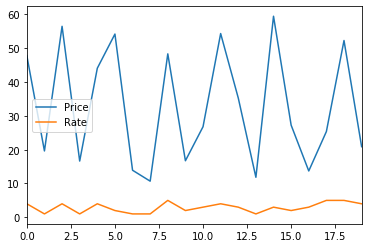

In [43]:
data.plot()